In [1]:
! pwd

/Users/nishant/Downloads/results


In [2]:
from smartprint import smartprint as sprint
import numpy as np

speed = np.load("nina_mean_gt_pred_unc_error_speed.npy")
volume = np.load("nina_mean_gt_pred_unc_error_volume.npy")

sprint (speed.shape, volume.shape)

speed.shape, volume.shape : (4, 495, 436, 4) (4, 495, 436, 4)


In [3]:
speed_gt, speed_pred, speed_unc, speed_err = speed[0, :, :, :], speed[1, :, :, :], \
                                            speed[2, :, :, :], speed[3, :, :, :]
volume_gt, volume_pred, volume_unc, volume_err = volume[0, :, :, :], volume[1, :, :, :], \
                                            volume[2, :, :, :], volume[3, :, :, :]

In [4]:
non_zero_speed = speed_gt > 0

density_gt = volume_gt/speed_gt
non_zero_density = density_gt > 0

valid_indices = non_zero_density & non_zero_speed

sprint (speed_gt.shape, non_zero_speed.shape)
speed_gt = speed_gt[valid_indices].tolist()
speed_pred = speed_pred[valid_indices].tolist()
speed_unc = speed_unc[valid_indices].tolist()
speed_err = speed_err[valid_indices].tolist()

volume_gt = volume_gt[valid_indices].tolist()
volume_pred = volume_pred[valid_indices].tolist()
volume_unc = volume_unc[valid_indices].tolist()
volume_err = volume_err[valid_indices].tolist()

density_gt = density_gt[valid_indices].tolist()



speed_gt.shape, non_zero_speed.shape : (495, 436, 4) (495, 436, 4)


/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_77085/1698644245.py:3: RuntimeWarning: divide by zero encountered in divide
  density_gt = volume_gt/speed_gt
/var/folders/dp/q2rz500s2kj79pnbkf36h7ch0000gq/T/ipykernel_77085/1698644245.py:3: RuntimeWarning: invalid value encountered in divide
  density_gt = volume_gt/speed_gt


In [5]:
len(density_gt)

111362

len(var) : 111362
len(var) : 111362
len(var) : 111362
len(var) : 111362
len(var) : 111362
len(var) : 111362


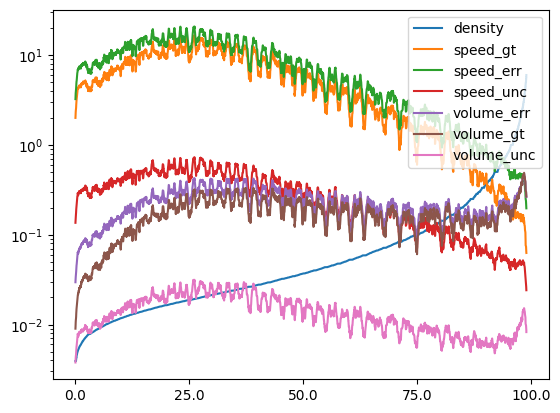

len(var) : 111362
len(var) : 111362
len(var) : 111362
len(var) : 111362
len(var) : 111362
len(var) : 111362


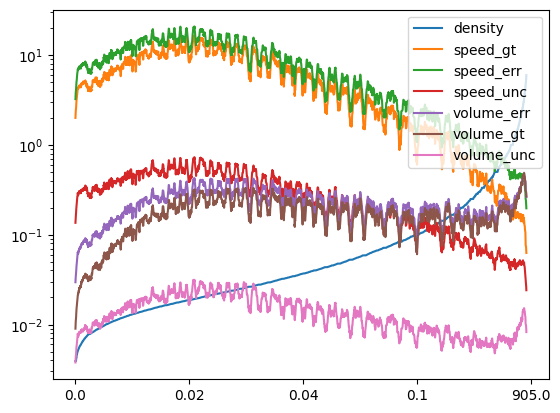

In [34]:
def sort_two_lists_according_to_first(X,Y):
    ss = sorted(zip(X, Y))
    X = [x for x, y in ss]
    Y = [y for x, y in ss]    
    return X, Y


import matplotlib.pyplot as plt
import numpy as np


smoothing_window = 1101


X, _ = sort_two_lists_according_to_first(density_gt, speed_gt)
plt.plot(X[smoothing_window//2:-smoothing_window//2], label="density")    

names = ['speed_gt', 'speed_err', 'speed_unc', 'volume_err', 'volume_gt', 'volume_unc']
for index, var in enumerate([speed_gt, speed_err, speed_unc, volume_err, volume_gt, volume_unc]):
    
    sprint (len(var))
    _, Y = sort_two_lists_according_to_first(density_gt, var)
    Y = Y[smoothing_window//2:-smoothing_window//2]
    
    plt.plot(np.convolve(Y, [1/smoothing_window]*smoothing_window, "same"), label=names[index])
#     plt.show()
plt.yscale("log")
p = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
plt.xticks(((len(X)-1) * p/100), map(str, p))
plt.legend()
plt.show()




############ Same thing with absolute values of quantiles on the xticks
def sort_two_lists_according_to_first(X,Y):
    ss = sorted(zip(X, Y))
    X = [x for x, y in ss]
    Y = [y for x, y in ss]    
    return X, Y


import matplotlib.pyplot as plt
import numpy as np


smoothing_window = 1101


X, _ = sort_two_lists_according_to_first(density_gt, speed_gt)
plt.plot(X[smoothing_window//2:-smoothing_window//2], label="density")    

names = ['speed_gt', 'speed_err', 'speed_unc', 'volume_err', 'volume_gt', 'volume_unc']
for index, var in enumerate([speed_gt, speed_err, speed_unc, volume_err, volume_gt, volume_unc]):
    
    sprint (len(var))
    _, Y = sort_two_lists_according_to_first(density_gt, var)
    Y = Y[smoothing_window//2:-smoothing_window//2]
    
    plt.plot(np.convolve(Y, [1/smoothing_window]*smoothing_window, "same"), label=names[index])
#     plt.show()
plt.yscale("log")

pos = np.array([0.0, 25.0, 50.0, 75.0, 100.0])
perc = np.round(np.percentile(X, p), 2)

plt.xticks(((len(X)-1) * pos/100), map(str, perc))
plt.legend()
plt.show()



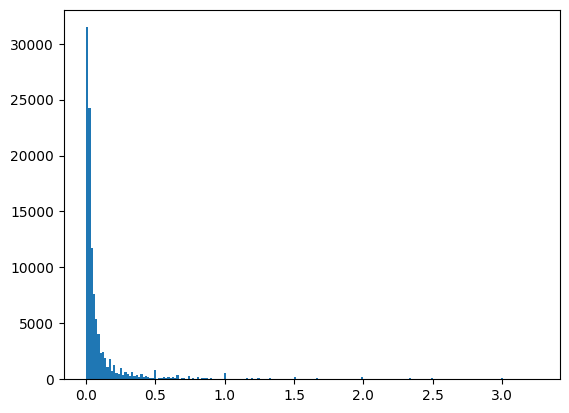

In [35]:
l = len(X)
plt.hist(X[:int(l*0.99)], 200)
plt.show()

In [31]:
np.percentile(X, p)

array([3.92156863e-03, 1.85589520e-02, 3.63636364e-02, 9.97877766e-02,
       9.05000000e+02])